# Heart Disease Prediction using Logistic Regression




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# loading data into pandas data frame

heart_data = pd.read_csv("/content/heart_disease_data.csv")
heart_data.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
# shape of dataset

heart_data.shape

(303, 14)

In [4]:
# describing data

heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# dataset information

heart_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# checking for missing values 

heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# checking the distribution of target variable

heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64



### Notation for Healthy and Defective Heart

- 1 Represents a Defective Heart
- 0 Represents a Healthy Heart


## Splitting the Features and Target

In [8]:
X = heart_data.drop(columns = 'target', axis = 1)
X.head()

# now X contains table without target column which will help for training the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [9]:
Y = heart_data['target']
Y.head()

# Y contains one column which includes output for validating the result after model prediction 


0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, stratify = Y, random_state = 3 )

# stratify will distribute 0 and 1 in even manner, of that prediction will be unbiased
# test_split tells a ratio about size of test data in dataset, means 30 percent of data is test data
# random_state tells about the randomness of data, and number tells about its extent of randomness



In [11]:
# checking shape of splitted data

print(X.shape, X_train.shape, X_test.shape)

(303, 13) (257, 13) (46, 13)


Logistic Regression

In [12]:
model = LogisticRegression()

In [13]:
# training the LogisticRegression model with training data
model.fit(X_train.values, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Visual Representation

  

In [14]:
# accuracy of traning data
# accuracy function measures accuracy between two values,or columns

X_train_prediction = model.predict(X_train.values)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print("The accuracy of training data : ", training_data_accuracy)


The accuracy of training data :  0.8599221789883269


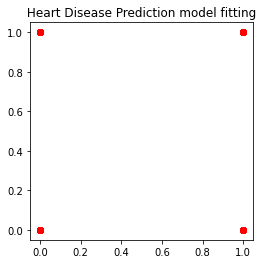

In [19]:
# prediction graph for training data

plt.figure(figsize=(4,4))
plt.scatter(Y_train, X_train_prediction , color = 'red')
plt.title(" Heart Disease Prediction model fitting ")
plt.show()

In [16]:
# accuracy of test data

X_test_prediction = model.predict(X_test.values)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("The accuracy of test data : ", test_data_accuracy)


The accuracy of test data :  0.8043478260869565


##  Prediction system



  - take input data
  

In [20]:
# input feature values
input_data = (42,1,0,136,15,0,1,125,1,1.8,1,0,1)

# change the input data into numpy array 

input_data_as_numpy_array = np.array(input_data)

# reshape the array to predict data for only one instance

reshaped_array = input_data_as_numpy_array.reshape(1,-1)


In [21]:
# predicting the result and printing it

prediction = model.predict(reshaped_array)

print(prediction)

if(prediction[0] == 0):
    print("Patient has a healthy heart 💛💛💛💛")

else:
    print("Patient has a unhealthy heart 💔💔💔💔")

[1]
Patient has a unhealthy heart 💔💔💔💔


### Notations 
  - [0] : means patient has a healthy heart 💛💛💛💛
  - [1] : means patient has a unhealthy heart 💔💔💔💔
  